# Information theory - practice
## Entropy
### Why is there a log in the entropy?

Entropy is defined as $$H = -\sum _i ^ n p_i log(p_i)$$. Entropy itself represents the average information in the system measured in bits. In other words it represents the average number of yes/no questions needed to answer whether a particular property holds in the system, i.e. is the average system state higher or equal than some value $c$. The log in the equation comes from the average number of bits needed to encode the system. To illustrate consider a 3 state binary system. The number of combinations of states is exponentional, i.e.g $2^ \bar H = M$ where $\bar H$ represents the entropy and $M$  the total number of states. In order to solve for the entropy we take the logarithm:
$$\bar H = log_2 (M)$$

# Izhikevich neurons
For spiking neurons we can use the interspike interval to quantify different information theoretical properties. Suppose the interspike interval (ISI) of an input spike train is $X = \{x_1, \ldots, x_n\}$, where $n$ is the number of presynaptic ISIs and $X$ represents a Poisson process converying temporal information. The first percentile of $X$ can be used as binning resolution such that the information will be finite. This will result in the entropy of the output spike train to be $$ H (Y) = \sum_{i=1}^{100} p(y_i) \log ( p(y_i))$$, where $p(y_i)$ represents the fraction of spikes falling in the $P_i$ ($i$-th percentile).

The reliability of the post-synaptic response can be quantified with the conditional entropy $$H(Y \vert X) = -\sum_{i=1}^{100} p(y_i \vert X) \log_2 p(y_i \vert X)$$

The mutual information will thus be: $$I(X;Y) = H(Y) - H(Y \vert X)$$


2000


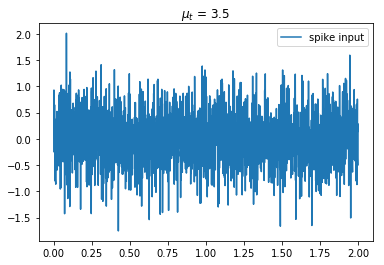

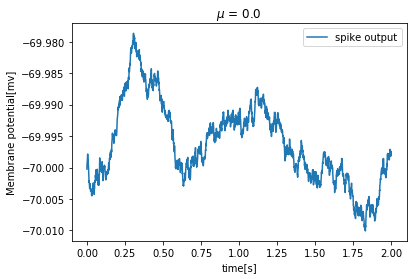

In [7]:
from Izhikevich import izhikevich
from numpy import *; from matplotlib.pyplot import *
# TYPICAL VALUES FROM Izikevich paper
v = -70 # mV
a =  .02 # time scale recovery variable
b = .2  # sensitivity of the recovery variable to u
# b = 2
c = -65 # mV  afterspike reset value of membrane potential caused by K+ influx
d = 2   # describes after spike reset of the recovery variable u caused by slow-high treshold of Na+ and K+
u = b * v
k = 1
nSteps = 1000
dt     = 1e-3
# dt = .5
time   = arange(0, 2, dt)
print(len(time))
meanf  = 3
# I      = array([1 if random.rand() <= meanf * dt else 0  for i in time])
I = random.normal(loc = 0 , scale = .5, size = len(time))
neuron = izhikevich.Izikevich(v, u, a, b, c, d, dt)
uv     = array([neuron.updateState(i) for i in I])

# plot spike input
fig, ax = subplots(); ax.plot(time, I, label = 'spike input'); 
ax.set_title('$\mu_t$ = {0:.1f}'.format(sum(I) / max(time)))
ax.legend()

# plot spike output 
fig, ax = subplots()
# ax.plot(time, uv[:,0])
ax.plot(time, uv[:,0], label = 'spike output')
# ax.plot(time, I, label = 'spike input')
setp(ax, 'xlabel', 'time[s]', 'ylabel', 'Membrane potential[mv]')
ax.set_title('$\mu$ = {0:.1f}'.format(sum(uv[...,-1]) / max(time)))
ax.legend()
show()

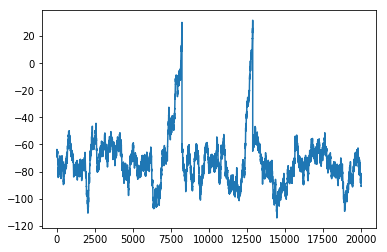

In [76]:
# show that neuron will converge to subthreshold sans stimulation
neuron = izhikevich.Izikevich(v, u, a, b, c, d, dt)
spikes = array([neuron.updateState(random.randn())[0] for i in range(20000)])
fig, ax = subplots(); ax.plot(spikes) 
show()

In [19]:
# multiple simulations
nTrials, nSpikes = 100, 100
inputs  = []
outputs = []
conditionaly_entropy = []
meanfs = [5, 10, 20] # mean firing rates
# meanfs = logspace(0, 2, 15)
'''
for every mean firing rate we
1) run ntrials
The idea is to take the maximum isi value and make some sort of bin out of this
I will take 100 steps from 0, max isi value [not implemented no idea what the paper means]
assert that we have the same number of output spikes
'''

def get_x_spikes(model, meanf, dt, nspikes = 400):
    spikes, t = 0, 0
    isi       = []
    while spikes <= nspikes:
        i = 1 if random.rand() <= meanf * dt else 0
        spike = model.updateState(i + random.randn())[-1]
        if spike: 
            isi.append(t)
            spikes += 1
        t += 1
    return isi

from tqdm import tqdm
for meanf in meanfs:    
    print('busy on %.1f' %(meanf))
    for trial in tqdm(range(nTrials)):
#         if trial % 10 == 0:
#             print('.', end = '')
        I = array([1 if random.rand() < meanf * dt else 0 for t in time])
        neuron     = izhikevich.Izikevich(v, u, a, b, c, d, dt) # TODO: change this
#         output     = array([neuron.updateState(i + random.rand() * 25) for i in I])[...,-1]
        outputs.append(get_x_spikes(neuron, meanf, dt, nSpikes))
#         inputs.append(I); outputs.append(output) # store the spikes
#     print('')
# inputs = array(inputs)
outputs = array(outputs)


  0%|          | 0/100 [00:00<?, ?it/s]

busy on 5.0



  4%|▍         | 4/100 [00:08<03:29,  2.18s/it]
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/casper/miniconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/casper/miniconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/casper/miniconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  0%|          | 0/100 [00:00<?, ?it/s]

busy on 10.0


  0%|          | 0/100 [00:00<?, ?it/s]

busy on 20.0


100%|██████████| 100/100 [02:20<00:00,  1.40s/it]


0.0576201317495 4.1077168027e-05 3.94662986926e-05
0.0635600183778 4.62491075718e-05 4.40040052625e-05
0.0843474632813 6.33686535032e-05 5.96772756293e-05


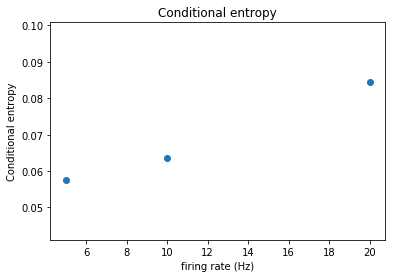

In [37]:
# inputs = inputs.reshape(len(meanfs), nTrials, -1)
outputs = outputs.reshape(len(meanfs), nTrials, -1)
entropies = []
# print(outputs)
for tmp in outputs:
    isi = ()
    n = 0
    for i in tmp:
        isi_trial = tuple(diff(i)) # assumes i has the time stamps already (!); was bug
        isi = isi + isi_trial
    perc = [percentile(isi, i) for i in range(1, 100)]
    p, _ = histogram(isi, bins = perc, normed = 1)
#     print(p); assert 0
#     p    = array([pi / ((nTrials)) for pi in p])
    H = -sum(p * log2(p))
    
    entropies.append(H)
    print(H, max(p), min(p))
    assert max(p) <= 1 and min(p) >= 0
    
fig, ax = subplots()
ax.set_title('Conditional entropy')
ax.scatter(meanfs, entropies)
setp(ax, 'xlabel', 'firing rate (Hz)', 'ylabel', 'Conditional entropy')
show()

In [54]:
tmp = diff(outputs, axis = -1)
tmp = tmp.reshape(outputs.shape[0], -1)


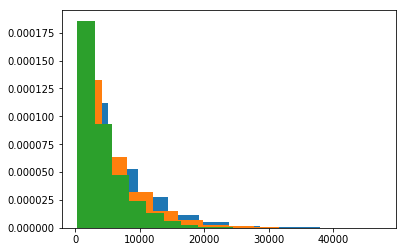

In [56]:
fig, ax = subplots(); [ax.hist(i, density = 1) for i in tmp]; show()